# Customer Churn Prediction using Logistic Regression in Python [Scikit-learn and Pandas]

## Logistic Regression

Logistic Regression is a variant of Linear Regression, and it is used when the dependent variable - 'y' is categorical or discrete. It predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve called **Logistic Curve or Sigmoid Curve** by taking the linear regression and transforming the numeric estimate into a probability with the function called sigmoid function 𝜎 defined as:
$$
h_\theta(x) = \sigma({\theta^TX})
$$

In this, we are going to predict the customers who leave a particular company or stays with it simply referred as **Churns** from the given customer dataset

In [56]:
# Load all necessary header files or libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
%matplotlib inline

### Data Loading

In [21]:
#Loading the dataset called ChurnData.csv
dataset=pd.read_csv("/.......././ChurnData.csv")
dataset.shape

(200, 28)

### Data Visualization

In [20]:
#Visualizing the first 15 rows of the dataset
dataset.head(15)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [22]:
#Visualizing the statistical details of the dataset
dataset.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


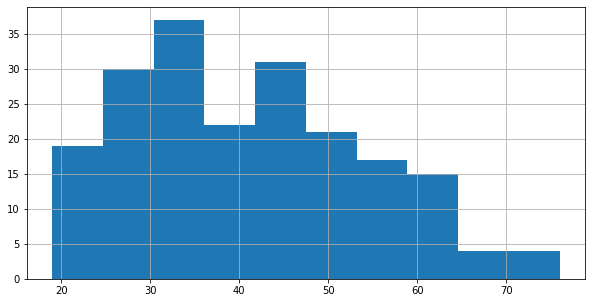

In [7]:
#Histogram Plot
dataset['age'].hist(figsize=(10,5))


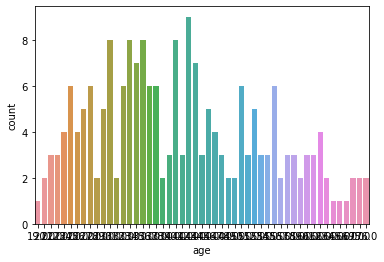

In [8]:
#Count Plot
sea.countplot(x='age',data=dataset)

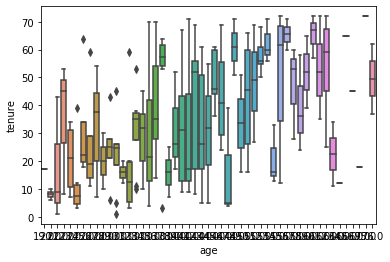

In [9]:
sea.boxplot(x='age',y='tenure',data=dataset)

### Data Preprocessing

In [13]:
#Sorting some features from the entire dataset
sorteddata = dataset[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless','churn']]

Churn being the dependent or target variable for Logistic regression, the churn column has to be converted into integer as sklearn can process only integer datatypes.

In [14]:
sorteddata['churn'] = sorteddata['churn'].astype('int')
sorteddata.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0


In [24]:
#Defining the independant variable X and Dependant variable Y 
X=np.asarray(sorteddata[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless']])
Y=np.asarray(sorteddata['churn'])
print('X:',X[0:10])
print('\nY:',Y[0:6])


X: [[ 11.  33.   7. 136.   5.   5.   0.   1.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.   1.   1.]
 [  7.  35.  14.  80.   2.  15.   0.   1.   0.]
 [ 68.  52.  17. 120.   1.  24.   0.   1.   0.]
 [ 42.  40.   7.  37.   2.   8.   1.   1.   1.]
 [  9.  21.   1.  17.   2.   2.   0.   0.   0.]
 [ 35.  50.  26. 140.   2.  21.   0.   1.   0.]
 [ 49.  51.  27.  63.   4.  19.   0.   1.   0.]]

Y: [1 1 0 0 0 0]


### Data Normalization or Standardization

Normalization is changing the values of numeric columns in the given dataset to a common scale. <br>
It is done by making the mean value of the data as **0** and standard deviation as **1**. It is done feature to feature. <br>
This improves the overall accuracy and the stability of the model

In [26]:
#Performing Data Standardization
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148],
       [ 1.505318  ,  0.83064562,  0.52797838,  0.35024865, -1.42318853,
         1.54168853, -0.85972695,  0.64686916, -0.63910148],
       [ 0.3008783 , -0.08931261, -0.4588971 , -0.29763719, -0.6433592 ,
        -0.24902047,  1.16316   ,  0.64686916,  1.56469673],
       [-1.22783362, -1.54591314, -1.05102238, -0.45375426, -0

### Data Splitting into Training and test data

In [27]:
#Splitting the dataset into training and test sets.
#Dataset is split as 80% of the entire data for training and the 20% for testing.
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)


### Performing Logistic Regression by creating Classifier model

In [30]:
logis_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
logis_reg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [40]:
y_predict = logis_reg.predict(X_test)

#Returns the probabilities for the predictions made (i.e.) estimates for all classes
y_predict_prob = logis_reg.predict_proba(X_test)

print(y_predict)
print("\nPredicted Probabilities:\n",y_predict_prob)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1]

Predicted Probabilities:
 [[0.58711718 0.41288282]
 [0.56650898 0.43349102]
 [0.5313329  0.4686671 ]
 [0.66722528 0.33277472]
 [0.53481231 0.46518769]
 [0.59508358 0.40491642]
 [0.49995014 0.50004986]
 [0.56532893 0.43467107]
 [0.39939231 0.60060769]
 [0.59368426 0.40631574]
 [0.54844546 0.45155454]
 [0.58957413 0.41042587]
 [0.52439771 0.47560229]
 [0.41344893 0.58655107]
 [0.68930146 0.31069854]
 [0.51576247 0.48423753]
 [0.4969602  0.5030398 ]
 [0.46038301 0.53961699]
 [0.47010467 0.52989533]
 [0.57170621 0.42829379]
 [0.50781873 0.49218127]
 [0.49802608 0.50197392]
 [0.66938224 0.33061776]
 [0.49625351 0.50374649]
 [0.47635919 0.52364081]
 [0.73040145 0.26959855]
 [0.45111513 0.54888487]
 [0.49187403 0.50812597]
 [0.4927476  0.5072524 ]
 [0.73618723 0.26381277]
 [0.70809718 0.29190282]
 [0.5549927  0.4450073 ]
 [0.40681176 0.59318824]
 [0.73720605 0.26279395]
 [0.6355682  0.3644318 ]
 [0.60354024 0.

### Model Evaluation

In [48]:
#Using Jaccard Index to evaluate the model's accuracy
acc=jaccard_similarity_score(y_test, y_predict)
print(acc)
print("Accuracy Score:",acc*100)


0.65
Accuracy Score: 65.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [53]:
#Using Confusion Matrix to evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predict))
print("\nReport:\n",classification_report(y_test,y_predict))

Confusion Matrix:
 [[18  7]
 [ 7  8]]

Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



Reference: <br> 
https://www.coursera.org/